In [1]:
from PIL import Image
import numpy as np
import matplotlib.pylab as plt

In [2]:
test_i = 1
fn_label = './paper_data/test0{0}.label.png'.format(test_i)
fn_test = './paper_data/test0{0}.png.test.png'.format(test_i)

In [3]:
img_test = Image.open(fn_test).convert('L')
img_label = Image.open(fn_label).convert('L').resize(img_test.size)

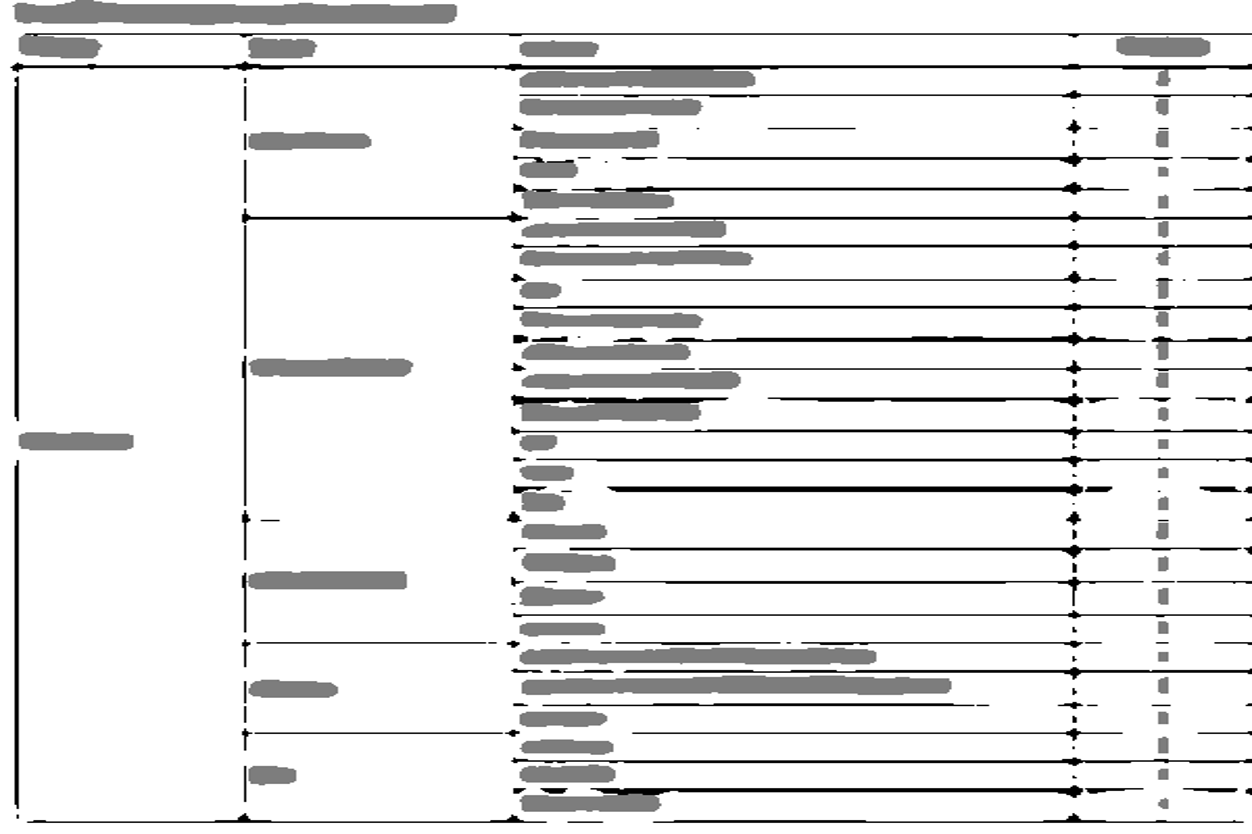

In [4]:
img_test

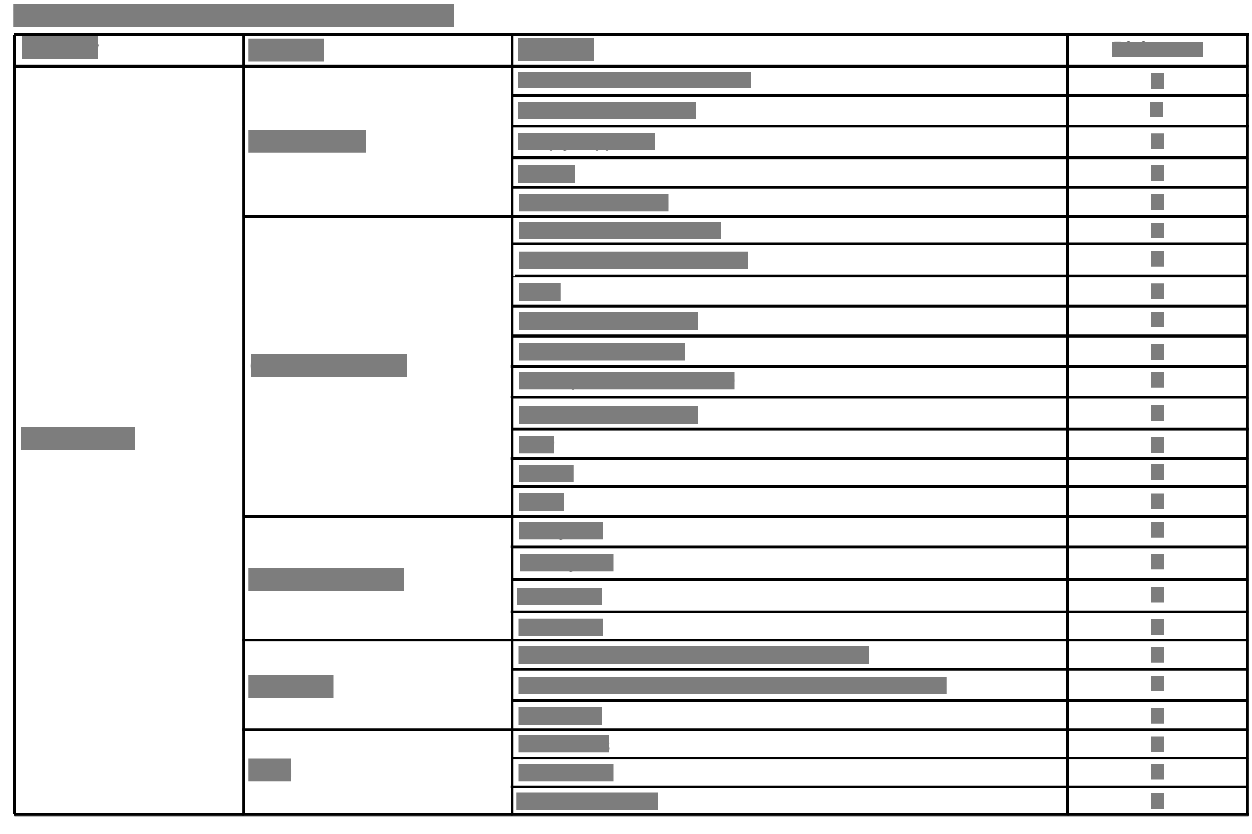

In [5]:
img_label

In [6]:
def get_3class_img(img):
    img = np.array(img)
    img[img > 160] = 255
    img[img <= 85] = 0

    mask1 = img <=160 
    mask2 = img > 85
    img[mask1 & mask2] = 125
    
    return img

In [7]:
img_label = get_3class_img(img_label)
img_test = get_3class_img(img_test)
np.array(img_label).shape, np.array(img_test).shape

((834, 1252), (834, 1252))

In [8]:
# tmp = np.ones(np.array(img_label).shape) * 255
# for r_i in np.arange(img_label.shape[0]):
#     for c_i in np.arange(img_label.shape[1]):
#         true_val = img_label[r_i, c_i]
#         test_val = img_test[r_i, c_i]
# #         print(true_val,test_val)
#         if true_val == test_val and test_val == 0:
#             tmp[r_i, c_i] = 0

# Image.fromarray(tmp).convert('L')

In [9]:
import pandas as pd

In [10]:
cm = pd.DataFrame(np.zeros((3, 3)), index=[0, 125, 255], columns=[0, 125, 255])

In [11]:
for r_i in np.arange(img_label.shape[0]):
    for c_i in np.arange(img_label.shape[1]):
        true_val = img_label[r_i, c_i]
        test_val = img_test[r_i, c_i]
        if test_val == 0:
            cm.loc[0, 0] = cm.loc[0, 0] + 1
        else:
            cm.loc[true_val, test_val] = cm.loc[true_val, test_val] + 1

In [12]:
cm.to_csv('./paper_data/cm_0{0}.csv'.format(test_i))
cm

,0,125,255
0,48350.0,5494.0,51012.0
125,0.0,75454.0,25960.0
255,0.0,15037.0,822861.0


In [13]:
img_label[r_i, c_i], img_test[r_i, c_i]

(255, 255)

In [14]:
true_val, test_val

(255, 255)